In [194]:
import matplotlib.ticker as mtick
from datetime import datetime
from IPython.display import display, HTML
from matplotlib import rc
import os
from pandas import ExcelFile
from pandas import ExcelWriter
import matplotlib.dates as mdates
import csv
from itertools import islice
from PIL import Image
from functools import reduce
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import numpy.polynomial.polynomial as poly
from dateutil import relativedelta
import pandas as pd
import numpy as np
import math
from wdmtoolbox import wdmtoolbox
import matplotlib.pyplot as plt
%matplotlib inline
# center all the figures and tables throughout the report
display(HTML("""<style>.output {
    display: flex;
    align-items: center;
    text-align: center;}</style> """))
print(' All libraries, tools, and functions have been succesfully uploaded  ')


 All libraries, tools, and functions have been succesfully uploaded  


In [2]:
def read_file(file_path):
    base_directory = os.getcwd()
    # give the file path from the base directory
    data = base_directory + str(file_path)
    return pd.read_excel(data, engine='openpyxl')


# Comal springs

## Extratree & XGBoost

In [55]:
Extratree_base = '/Comal/Extratree_tuned_/'
XGBoost_base = '/Comal/XGBoost_tuned_/'


# ExtraTree
Historical_path = Extratree_base+'/df_AI.xlsx'
df_history = read_file(Historical_path)
# Load the RCP45 dataframe
RCP_45 = Extratree_base+'/RCP45/df_future.xlsx'
df_RCP45 = read_file(RCP_45)
# Load the RCP85 dataframe
RCP_85 = Extratree_base+'/RCP85/df_future.xlsx'
df_RCP85 = read_file(RCP_85)
# Image of Training,Testing adn model importance
train_plot = Image.open(
    os.getcwd()+'/Comal/Extratree_tuned_/Train_Plot_score.jpg')
test_plot = Image.open(
    os.getcwd()+'/Comal/Extratree_tuned_/Test_Plot_score.jpg')
important_feature = Image.open(os.getcwd()+'/Comal/Extratree_tuned_/Features_importance/Feature Importances-Hist.jpg')


# XGBoost
Historical_path = '/Comal/XGBoost_tuned_/df_AI.xlsx'
df_history_xg = read_file(Historical_path)
# Load the RCP45 dataframe
RCP_45 = '/Comal/XGBoost_tuned_/RCP45/df_future.xlsx'
df_RCP45_xg = read_file(RCP_45)
# Load the RCP85 dataframe
RCP_85 = '/Comal/XGBoost_tuned_/RCP85/df_future.xlsx'
df_RCP85_xg = read_file(RCP_85)
# Image of Training,Testing adn model importance
train_plot_xg = Image.open(os.getcwd()+'/Comal/XGBoost_tuned_/Train_Plot_score.jpg')
test_plot_xg = Image.open(
    os.getcwd()+'/Comal/XGBoost_tuned_/Test_Plot_score.jpg')
important_feature_xg = Image.open(os.getcwd()+'/Comal/XGBoost_tuned_/Features_importance/Feature Importances - Hist.jpg')





In [56]:
def make_date_index(df,change_to_column):
    df = df.set_index(change_to_column)
    df.index = df.index.set_names('DATE')
    return df
df_history = make_date_index(df_history, 'DATE')
df_RCP45 = make_date_index(df_RCP45, 'Unnamed: 0')
df_RCP85 = make_date_index(df_RCP85, 'Unnamed: 0')

df_history_xg = make_date_index(df_history_xg, 'DATE')
df_RCP45_xg = make_date_index(df_RCP45_xg, 'Unnamed: 0')
df_RCP85_xg = make_date_index(df_RCP85_xg, 'Unnamed: 0')

## Critical level for comal springs

### Plot the training_test and feature importance

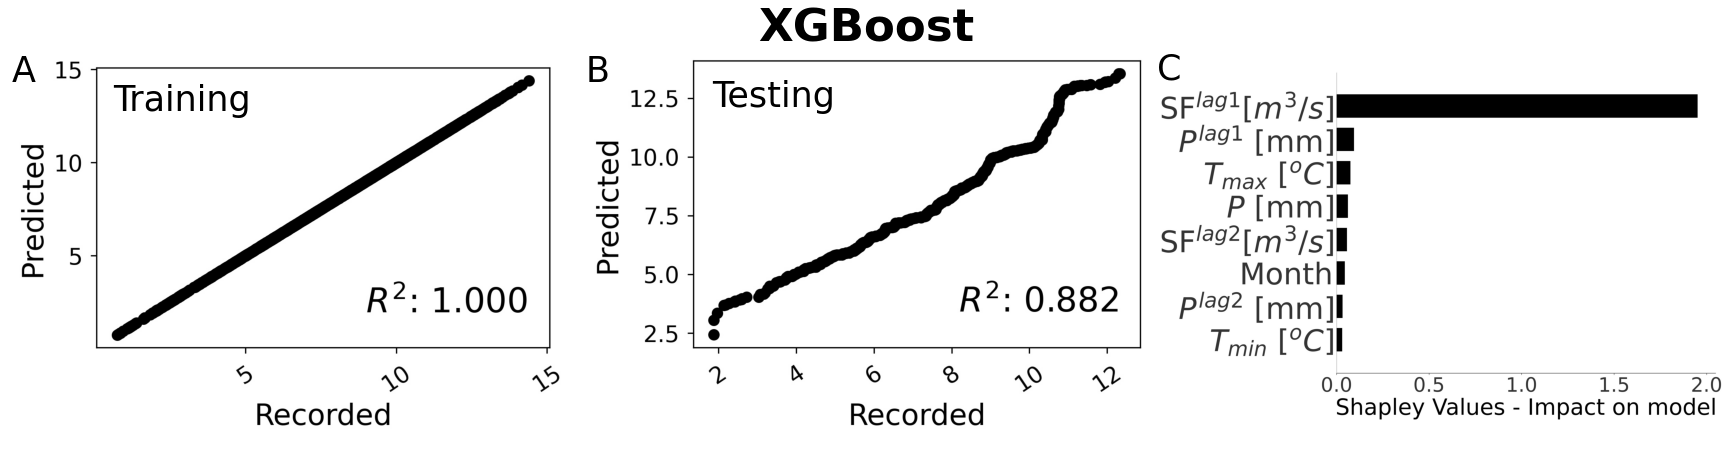

In [57]:
fig = plt.figure(figsize=(24, 24))
# fig.set_size_inches(11.69,8.27)

ax1 = plt.subplot2grid((1, 3), (0, 0),)
ax1.imshow(train_plot_xg)
ax1.text(270, 155, 'Training', fontsize=35, fontweight='medium')
ax1.text(10, 80, 'A', fontsize=35, fontweight='medium', )
ax1.set_axis_off()

ax2 = plt.subplot2grid((1, 3), (0, 1),)
ax2.text(335, 145, 'Testing', fontsize=35)
ax2.text(10, 80, 'B', fontsize=35, fontweight='medium', )
ax2.set_title('XGBoost', loc='center', fontsize=45,
              fontweight='bold', pad=0.75)
ax2.imshow(test_plot_xg)
ax2.set_axis_off()

ax3 = plt.subplot2grid((1, 3), (0, 2), )
ax3.imshow(important_feature_xg)
ax3.text(10, 80, 'C', fontsize=35, fontweight='medium', )
ax3.set_axis_off()
plt.tight_layout(pad=0.5)
plt.savefig(os.getcwd()+XGBoost_base+'/Train_test_feature importance.jpg',
            format='jpeg', dpi=300, bbox_inches='tight')


## Feature Importance plots and inflection points

In [58]:

# load and show an image with Pillow
from PIL import Image
import matplotlib.pyplot as plt
# load the image
image_1 = Image.open(os.getcwd()+XGBoost_base +
                     '/Features_importance/SF_Lag1 Hist.jpg')
image_2 = Image.open(os.getcwd()+XGBoost_base +
                     '/Features_importance/Prlag1 -.jpg')
image_3 = Image.open(os.getcwd()+XGBoost_base +
                     '/Features_importance/Tmax - Hist.jpg')
image_4 = Image.open(os.getcwd()+XGBoost_base+'/Features_importance/Pr -.jpg')


<Figure size 1728x1728 with 0 Axes>

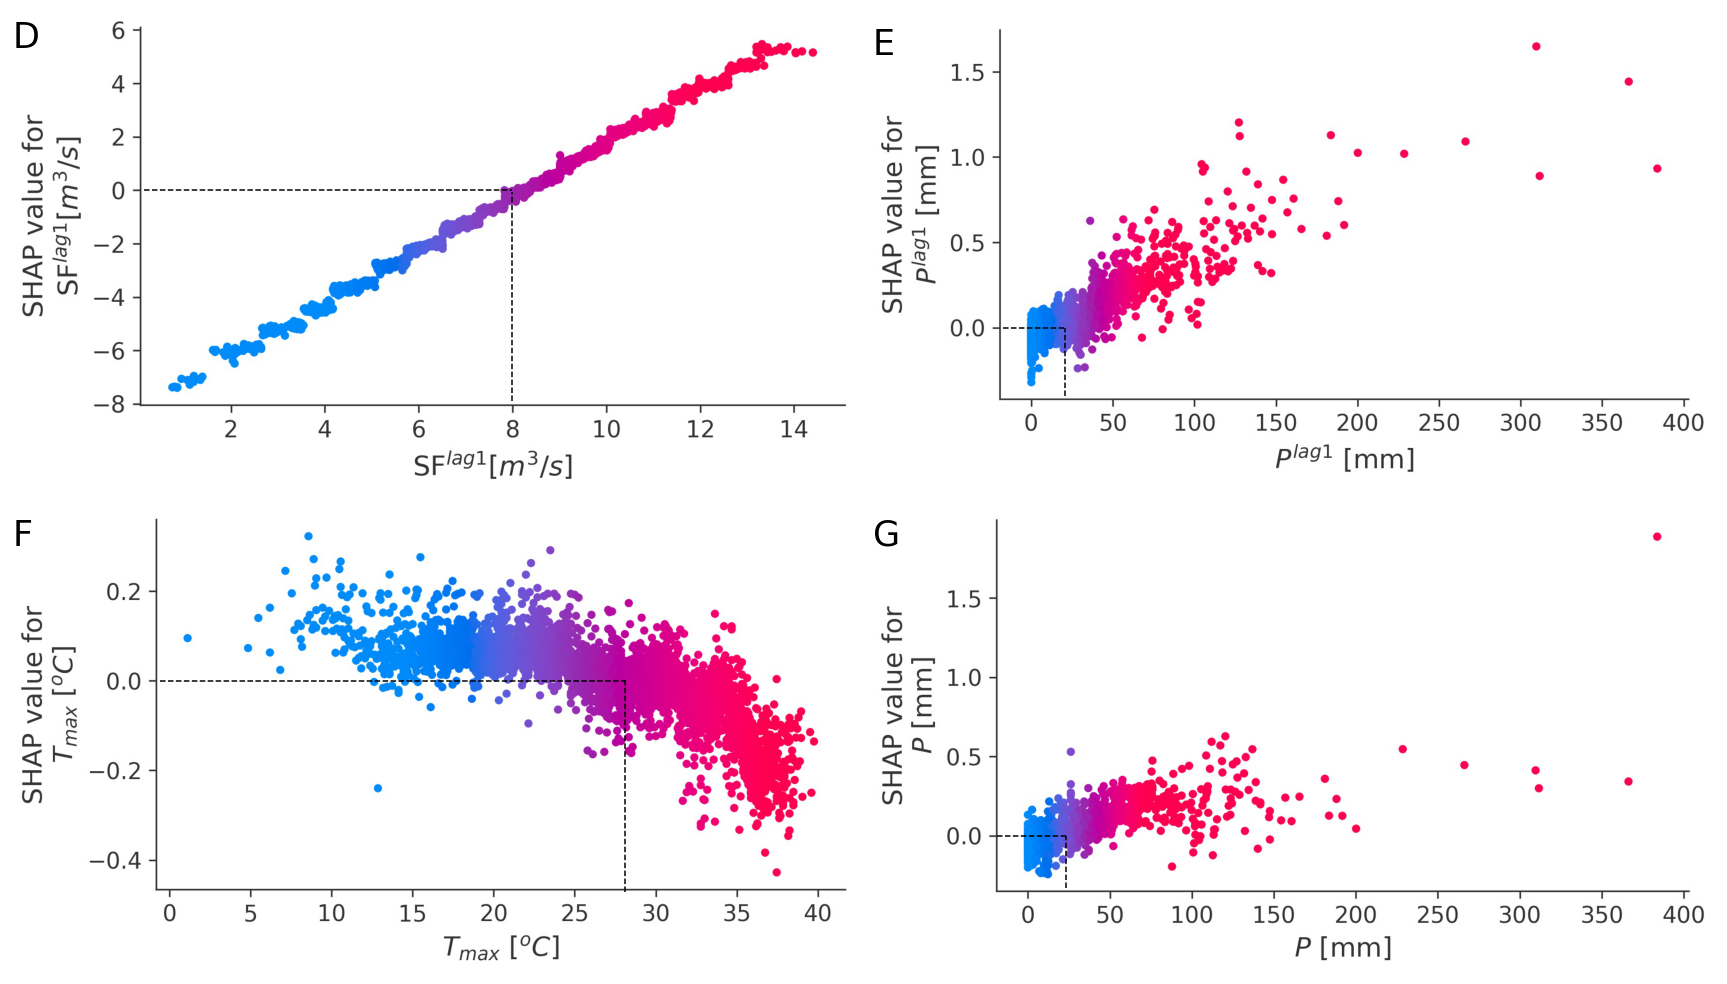

In [59]:


fig = plt.figure(figsize=(24, 24))
fig = plt.figure(figsize=(24, 24))

ax4 = plt.subplot2grid((2, 2), (0, 0),)
ax4.imshow(image_1)
ax4.text(10, 80, 'D', fontsize=35, fontweight='medium', )
ax4.hlines(y=362, xmin=270, xmax=1000,
           linestyles="--", color='black', lw=1.5)
ax4.vlines(x=1000, ymin=780, ymax=365,
           linestyles="--", color='black', lw=1.5)
ax4.set_axis_off()

ax5 = plt.subplot2grid((2, 2), (0, 1),)
ax5.imshow(image_2)
ax5.text(10, 80, 'E', fontsize=35, fontweight='medium', )
ax5.hlines(y=632, xmin=275, xmax=400,
           linestyles="--", color='black', lw=1.5)
ax5.vlines(x=400, ymin=770, ymax=632,
           linestyles="--", color='black', lw=1.5)
ax5.set_axis_off()

ax6 = plt.subplot2grid((2, 2), (1, 0))
#ax2.text(270,150, 'Testing', fontsize = 35)
ax6.text(10, 80, 'F', fontsize=35, fontweight='medium', )
ax6.imshow(image_3)
ax6.hlines(y=353, xmin=308, xmax=1250,
           linestyles="--", color='black', lw=1.5)
ax6.vlines(x=1250, ymin=780, ymax=352,
           linestyles="--", color='black', lw=1.5)

ax6.set_axis_off()


ax7 = plt.subplot2grid((2, 2), (1, 1))
ax7.text(10, 80, 'G', fontsize=35, fontweight='medium', )
ax7.imshow(image_4)
ax7.hlines(y=665, xmin=260, xmax=400,
           linestyles="--", color='black', lw=1.5)
ax7.vlines(x=400, ymin=770, ymax=665,
           linestyles="--", color='black', lw=1.5)
ax7.grid()
ax7.set_axis_off()
plt.tight_layout(pad=0.75)

plt.subplots_adjust(hspace=-0.6)
#plt.savefig(os.getcwd()+XGBoost_base+'/Feature_importance_collage.jpg',
            #format='jpeg', dpi=300, bbox_inches='tight')


## Probability calculations

In [60]:
def probability(df_history, feature, cs, sign, inflection):

    """ Requires data-frame, feature (input), critical stage levels,
    less than or greater than sign, and the point(value) used to calculate the conditional probabilty with respect to the springflow.
    
                        P(A|B) = P(B|A).P(A)/P(B)
        
    """
    if sign == 'leq':
        for i in cs:
            true_pred = df_history[(df_history[feature] <= inflection) & (
                df_history['SF$[m^3/s]$'] <= (cs[i]))]['SF$[m^3/s]$'].count()

            total_cases = df_history[(
                df_history[feature] <= inflection)]['SF$[m^3/s]$'].count()

            print("Probability of " + str(i) +
                  ": {}".format(np.round((100 * true_pred/total_cases), 1)))
    else:
        for i in cs:
            true_pred = df_history[(df_history[feature] >= inflection) & (
                df_history['SF$[m^3/s]$'] <= (cs[i]))]['SF$[m^3/s]$'].count()

            total_cases = df_history[(
                df_history[feature] >= inflection)]['SF$[m^3/s]$'].count()

            print("Probability of " + str(i) +
                  ": {}".format(np.round((100 * true_pred/total_cases), 1)))


In [61]:
cfs_to_m3 = 0.028316847

cs1 = 225 * cfs_to_m3      # 225 # ft
cs2 = 200 * cfs_to_m3      # 200 # ft
cs3 = 150 * cfs_to_m3      # 150 # ft
cs4 = 100 * cfs_to_m3      # 100 # ft
cs5 = 45 * cfs_to_m3      # 45  # ft

cs_levels = dict(zip(['CS1', 'CS2', 'CS3', 'CS4', 'CS5'],
                     np.round([cs1, cs2, cs3, cs4, cs5], 2)))
list(df_history.columns)

['$T_{min}$ [$^oC$]',
 '$T_{max}$ [$^oC$]',
 '$P$ [mm]',
 'SF$[m^3/s]$',
 'Month',
 '$T_{max}^{lag1}$ [$^oC$]',
 '$T_{max}^{lag2}$ [$^oC$]',
 '$T_{min}^{lag1}$ [$^oC$]',
 '$T_{min}^{lag2}$ [$^oC$]',
 '$P^{lag1}$ [mm]',
 '$P^{lag2}$ [mm]',
 'SF$^{lag1} [m^3/s]$',
 'SF$^{lag2} [m^3/s]$']

In [62]:
## Consider the feature importance 1 - 4 or just climate features 
probability(df_history, 'SF$^{lag1} [m^3/s]$', cs_levels, 'leq', 8)


Probability of CS1: 52.6
Probability of CS2: 34.2
Probability of CS3: 13.8
Probability of CS4: 5.7
Probability of CS5: 1.0


## Historical and future plots 

In [63]:
probability(df_RCP45, 'SF$^{lag1} [m^3/s]$', cs_levels, 'leq',8)


Probability of CS1: 72.7
Probability of CS2: 49.2
Probability of CS3: 14.5
Probability of CS4: 3.7
Probability of CS5: 0.0


## Insert the projection and barploot

In [64]:
Approved_date = str(df_history.last_valid_index()).strip(" 00:00:00")

In [65]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
fmt_fiveyears = mdates.YearLocator(5)

def plot_projections(df_AI,df_future, name):
	
	if name == 4.5:
		colour = 'darkorange'
	else:
		colour = 'crimson'
	
	
	fig, ax1 = plt.subplots(1,1, figsize=(16,7))
	#Plot the updated model SF with the exisitng data
	ax1.plot(df_AI.index,
				df_AI['SF$[m^3/s]$'], 
				'-', color = 'black',
				lw = 3, label = 'Historical Data')
	plt.ylim((0.01,16))
	plt.xlim(('1960','2100'))
	ax1.yaxis.set_major_locator(plt.MultipleLocator(4))
	ax1.xaxis.set_minor_locator(fmt_fiveyears)
	ax1.yaxis.set_minor_locator(plt.MultipleLocator(2))
	ax1.plot(df_future[str(Approved_date):'2100-01-03'].index,
			 df_future['SF$[m^3/s]$'][str(Approved_date):], '-', 
			 color = colour, lw = 3, label = 'Future_'+str(name)+ 'Projection')
	
	
	temp = pd.concat([df_AI['SF$[m^3/s]$'],
						 df_future['SF$[m^3/s]$'][str(Approved_date):]])
	phase1 = np.zeros(len(temp))
	phase1[phase1 == 0] = 225*0.028316847
	phase2 = np.zeros(len(temp))
	phase2[phase2 == 0] = 200*0.028316847
	phase3 = np.zeros(len(temp))
	phase3[phase3 == 0] = 150*0.028316847
	phase4 = np.zeros(len(temp))
	phase4[phase4 == 0] = 100*0.028316847
	phase5 = np.zeros(len(temp))
	phase5[phase5 == 0] = 45*0.028316847

	ax1.plot(temp.index, phase1, 
			'-', color='#f3ae85',
			 lw=5, label = 'Critical Stage I')
	ax1.plot(temp.index, phase2,
			'-', color='#f17e52',			
			 lw=5, label = 'Critical Stage II')
	ax1.plot(temp.index, phase3, 
			'-', color='#dc5328',
			lw=5, label = 'Critical Stage III')
	ax1.plot(temp.index, phase4, 
			'-', color='#b63609',
			 lw=5, label = 'Critical Stage IV')
	ax1.plot(temp.index, phase5, 
			'-', color='#420D09',
			 lw=5, label = 'Critical Stage V')

	ax1.set_xlabel('', fontsize = 36)
	ax1.tick_params(axis = "x", labelsize = 26, )
	ax1.xaxis.set_tick_params(pad=5)
	ax1.set_ylabel('SF$[m^3/s]$', fontsize = 36,labelpad=15)
	ax1.tick_params(axis = "y", labelsize = 26, )
	ax1.yaxis.set_tick_params(pad=5)

	tw = np.array (temp.index)
	plt.fill_between(tw, phase2[0],phase1[0],
					 alpha=0.20, facecolor='#ffa579')
	plt.fill_between(tw,phase2[0],phase3[0],
					 alpha=0.2, facecolor='#e9683c')
	plt.fill_between(tw, phase4[0] , phase3[0], 
					 alpha=0.20, facecolor='#cc4217')
	plt.fill_between(tw, phase5[0] , phase4[0], 
					 alpha=0.20, facecolor='#993404')
	plt.fill_between(tw,   phase5[0],phase5[0]-3, 
					 alpha=0.2, facecolor='#420D09')


	font = {'family': 'serif', 'color':  '#f3ae85', 'weight': 'bold', 'size': 20} 
	plt.text(tw[-1], phase1[0]-0.2, r'CS1', fontdict=font)
	font = {'family': 'serif', 'color':  '#f17e52', 'weight': 'bold', 'size': 20} 
	plt.text(tw[-1], phase2[0]-0.2, r'CS2', fontdict=font)
	font = {'family': 'serif', 'color':  '#dc5328', 'weight': 'bold', 'size': 20} 
	plt.text(tw[-1], phase3[0]-0.2, r'CS3', fontdict=font)
	font = {'family': 'serif', 'color':  '#b63609', 'weight': 'bold', 'size': 20}
	plt.text(tw[-1], phase4[0]-0.2, r'CS4', fontdict=font)
	font = {'family': 'serif', 'color':  '#420D09', 'weight': 'bold', 'size': 20}
	plt.text(tw[-1], phase5[0]-0.2, r'CS5', fontdict=font)
	font = {'family': 'serif', 'color':  colour, 'weight': 'bold', 'size': 28}
	plt.text(tw[-1000],phase1[0]+8.5, r'RCP'+str(name), fontdict=font)
	
	#--------------Annotate the plot -------------####
	plt.axvline(x= datetime(2020, 11, 29),
				color = 'gray', lw = 4, linestyle='--')
	font = {'family': 'serif',
			'color':  colour, 
			'weight': 'bold', 'size': 26,} 
	plt.text(tw[3500],phase1[0]+8.5, 
			 r'Projected', fontdict=font)
	font = {'family': 'serif', 
			'color':  'black', 
			'weight': 'bold', 'size': 26,} 
	plt.text(tw[200],phase1[0]+8.5,
			 r'Historical', fontdict=font)
	plt.tight_layout(pad=0.6)

	fig.savefig(str('Decremental_SF.jpg'), format='jpeg', dpi=300, bbox_inches='tight')
	fig = fig 
	return fig
	#ax1.grid()


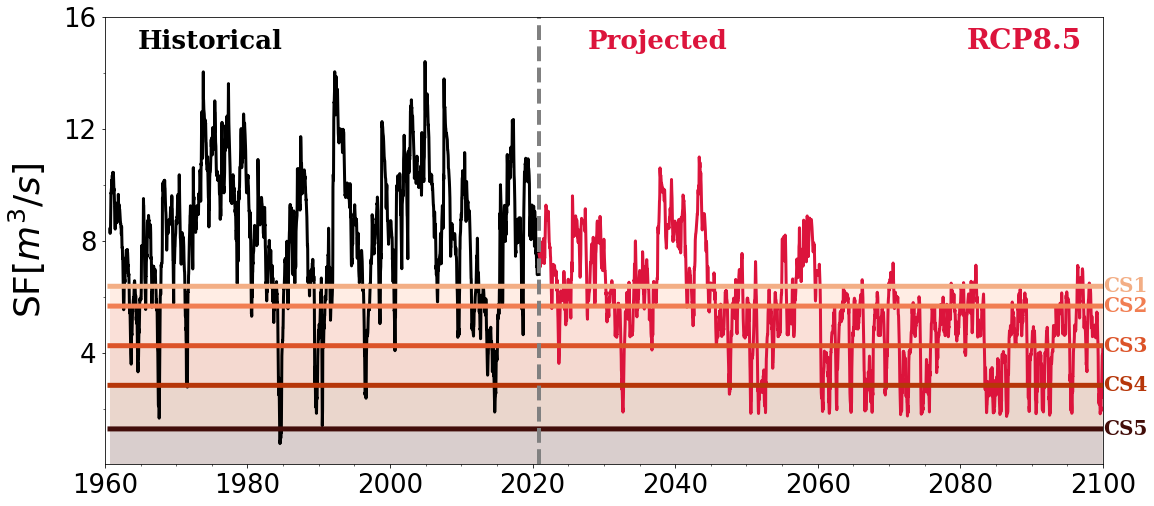

In [69]:
fig = plot_projections(df_history,df_RCP85,8.5)

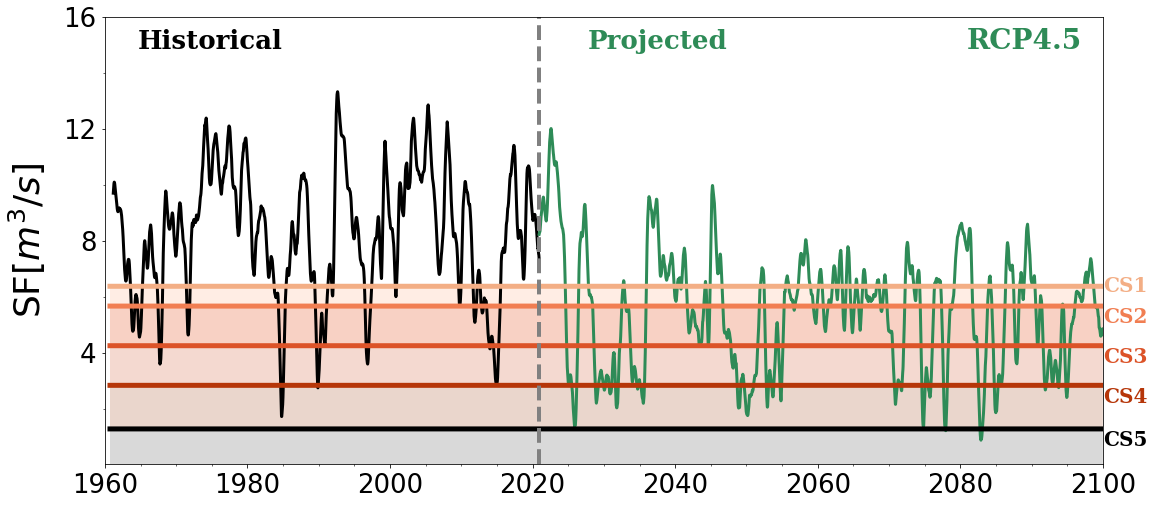

In [264]:

fig2

##52 weeks rolling mean  

(0.01, 10.0)

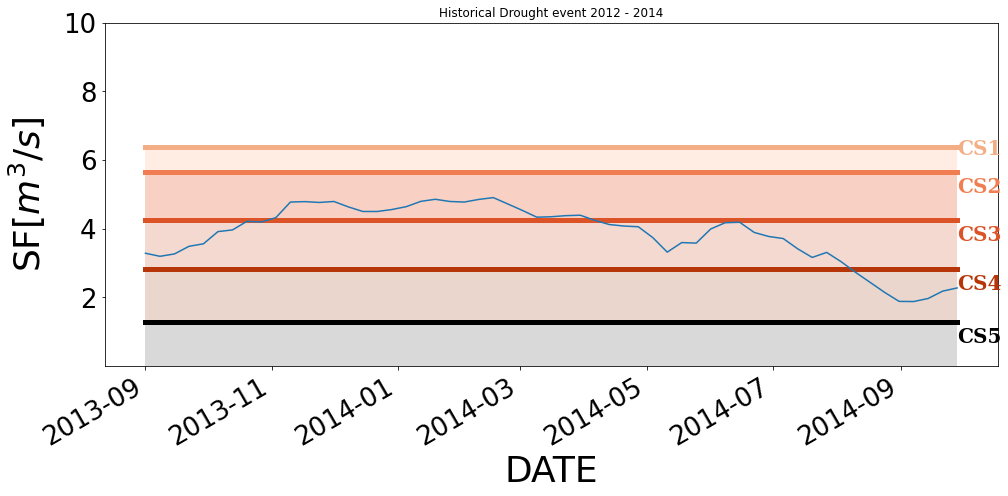

In [77]:
fig, ax1 = plt.subplots(1,1, figsize=(16,7))

drought_reference = "Historical Drought event 2012 - 2014"


temp = df_history["2013-09":'2014-09']
phase1 = np.zeros(len(temp))
phase1[phase1 == 0] = 225*0.028316847
phase2 = np.zeros(len(temp))
phase2[phase2 == 0] = 200*0.028316847
phase3 = np.zeros(len(temp))
phase3[phase3 == 0] = 150*0.028316847
phase4 = np.zeros(len(temp))
phase4[phase4 == 0] = 100*0.028316847
phase5 = np.zeros(len(temp))
phase5[phase5 == 0] = 45*0.028316847



ax1.plot(temp.index, phase1, 
		'-', color='#f3ae85',
		 lw=5, label = 'Critical Stage I')
ax1.plot(temp.index, phase2,
		'-', color='#f17e52',			
		 lw=5, label = 'Critical Stage II')
ax1.plot(temp.index, phase3, 
		'-', color='#dc5328',
		lw=5, label = 'Critical Stage III')
ax1.plot(temp.index, phase4, 
		'-', color='#b63609',
		 lw=5, label = 'Critical Stage IV')
ax1.plot(temp.index, phase5, 
		'-', color='black',
		 lw=5, label = 'Critical Stage V')

ax1.set_xlabel('', fontsize = 36)
ax1.tick_params(axis = "x", labelsize = 26, )
ax1.xaxis.set_tick_params(pad=5)
ax1.set_ylabel('SF$[m^3/s]$', fontsize = 36,labelpad=15)
ax1.tick_params(axis = "y", labelsize = 26, )
ax1.yaxis.set_tick_params(pad=5)

tw = np.array (temp.index)
plt.fill_between(tw, phase2[0],phase1[0],
				 alpha=0.20, facecolor='#ffa579')
plt.fill_between(tw,phase2[0],phase3[0],
				 alpha=0.3, facecolor='#e9683c')
plt.fill_between(tw, phase4[0] , phase3[0], 
				 alpha=0.20, facecolor='#cc4217')
plt.fill_between(tw, phase5[0] , phase4[0], 
				 alpha=0.20, facecolor='#993404')
plt.fill_between(tw,   phase5[0],phase5[0]-3, 
				 alpha=0.15, facecolor='black')

font = {'family': 'serif', 'color':  '#f3ae85', 'weight': 'bold', 'size': 20} 
plt.text(tw[-1], phase1[0]-0.2, r'CS1', fontdict=font)
font = {'family': 'serif', 'color':  '#f17e52', 'weight': 'bold', 'size': 20} 
plt.text(tw[-1], phase2[0]-0.6, r'CS2', fontdict=font)
font = {'family': 'serif', 'color':  '#dc5328', 'weight': 'bold', 'size': 20} 
plt.text(tw[-1], phase3[0]-0.6, r'CS3', fontdict=font)
font = {'family': 'serif', 'color':  '#b63609', 'weight': 'bold', 'size': 20}
plt.text(tw[-1], phase4[0]-0.6, r'CS4', fontdict=font)
font = {'family': 'serif', 'color':  'black', 'weight': 'bold', 'size': 20}
plt.text(tw[-1], phase5[0]-0.6, r'CS5', fontdict=font)
#font = {'family': 'serif', 'color':  colour, 'weight': 'bold', 'size': 28}

temp["SF$[m^3/s]$"].plot(title =drought_reference, ax = ax1)
plt.ylim((0.01,10))

In [123]:
df = temp[['$T_{max}$ [$^oC$]', '$P$ [mm]', 'SF$[m^3/s]$', '$T_{min}$ [$^oC$]', 'Month']]
temp = df_history["2013":'2013']

In [214]:
import calendar
d = dict(enumerate(calendar.month_abbr))
temp['month'] = temp.Month.map(d)
temp

/home/c0d3b23ak32/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,$T_{min}$ [$^oC$],$T_{max}$ [$^oC$],$P$ [mm],SF$[m^3/s]$,Month,$T_{max}^{lag1}$ [$^oC$],$T_{max}^{lag2}$ [$^oC$],$T_{min}^{lag1}$ [$^oC$],$T_{min}^{lag2}$ [$^oC$],$P^{lag1}$ [mm],$P^{lag2}$ [mm],SF$^{lag1} [m^3/s]$,SF$^{lag2} [m^3/s]$,month
DATE,,,,,,,,,,,,,,
2013-01-06,4.126984,12.460317,13.462,5.950857,1,15.476190,22.142857,1.666667,5.873016,0.508,0.000,5.898000,5.886000,Jan
2013-01-13,6.587302,17.698413,64.262,6.193286,1,12.460317,15.476190,4.126984,1.666667,13.462,0.508,5.950857,5.898000,Jan
2013-01-20,1.269841,15.634921,0.254,6.367000,1,17.698413,12.460317,6.587302,4.126984,64.262,13.462,6.193286,5.950857,Jan
2013-01-27,11.587302,24.126984,0.000,6.359000,1,15.634921,17.698413,1.269841,6.587302,0.254,64.262,6.367000,6.193286,Jan
2013-02-03,8.333333,22.698413,0.000,6.302286,2,24.126984,15.634921,11.587302,1.269841,0.000,0.254,6.359000,6.367000,Feb
2013-02-10,12.619048,23.492063,2.286,6.278143,2,22.698413,24.126984,8.333333,11.587302,0.000,0.000,6.302286,6.359000,Feb
2013-02-17,4.682540,20.476190,0.000,6.250000,2,23.492063,22.698413,12.619048,8.333333,2.286,0.000,6.278143,6.302286,Feb
2013-02-24,9.444444,22.698413,0.254,6.156714,2,20.476190,23.492063,4.682540,12.619048,0.000,2.286,6.250000,6.278143,Feb
2013-03-03,3.809524,20.317460,0.000,6.051571,3,22.698413,20.476190,9.444444,4.682540,0.254,0.000,6.156714,6.250000,Mar


Since we are comparing to the 2013 drought. 
Shall we gatehr the events that occured in 2013?

- '$T_{max}$ [$^oC$]'
- '$P$ [mm]'
- 'SF$[m^3/s]$'
- '$T_{min}$ [$^oC$]'

make boxplot to give us the mean and extremes, we can compare these values to our projection values. Annual box plot of the same features and a conditions to obtain all years that/occurances that this occurs.


Text(0.5, 298.59999999999997, '')

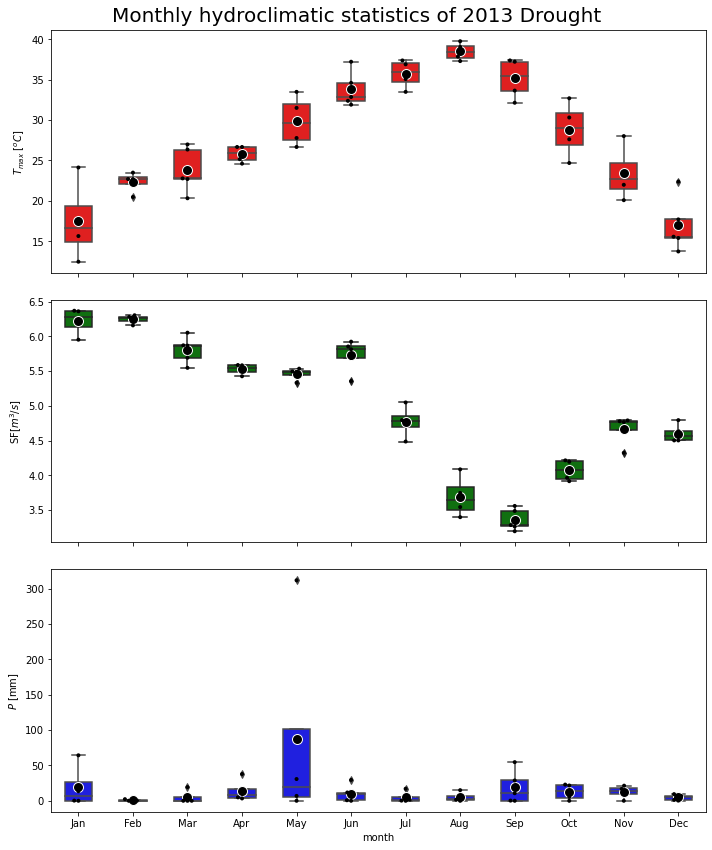

In [239]:
import seaborn as sns
import matplotlib
fig , ax = plt.subplots(3,1,figsize=(10,12),sharex = True)


hydroclimatic_features = ['$T_{max}$ [$^oC$]', 'SF$[m^3/s]$',  '$P$ [mm]']
colours_bx = ['red','green','blue']

fig.suptitle('Monthly hydroclimatic statistics of 2013 Drought', fontsize=20)

for  count, features in enumerate(hydroclimatic_features):
    
    sns.swarmplot(x='month', y=features, ax = ax[count],
                data=temp,  color='black', size = 4,)

    sns.boxplot(x='month', y= features, ax = ax[count],
            data=temp,  color=colours_bx[count], 
            width = 0.5,
            showmeans = True,meanprops={"marker":"o",
                        "markerfacecolor":"black", 
                        "markeredgecolor":"white",
                        "markersize":"10"})
    #ax[count].xaxis.grid(True,)
    #ax[count].yaxis.grid(True,)
    fmt_fiveyears = mdates.YearLocator(5)

    plt.tight_layout()
#sns.boxenplot(x='Month', y='SF$[m^3/s]$',
#           data=temp,  color='gray', order = [9,10,11,12,1,2,3,4,5,6,7,8],)

#df_history["SF$[m^3/s]$"]["2013":"2014"].plot.box

# Set the locato
ax[0].set_xlabel('')
ax[1].set_xlabel('')


<AxesSubplot:xlabel='month', ylabel='RCP 4.5'>

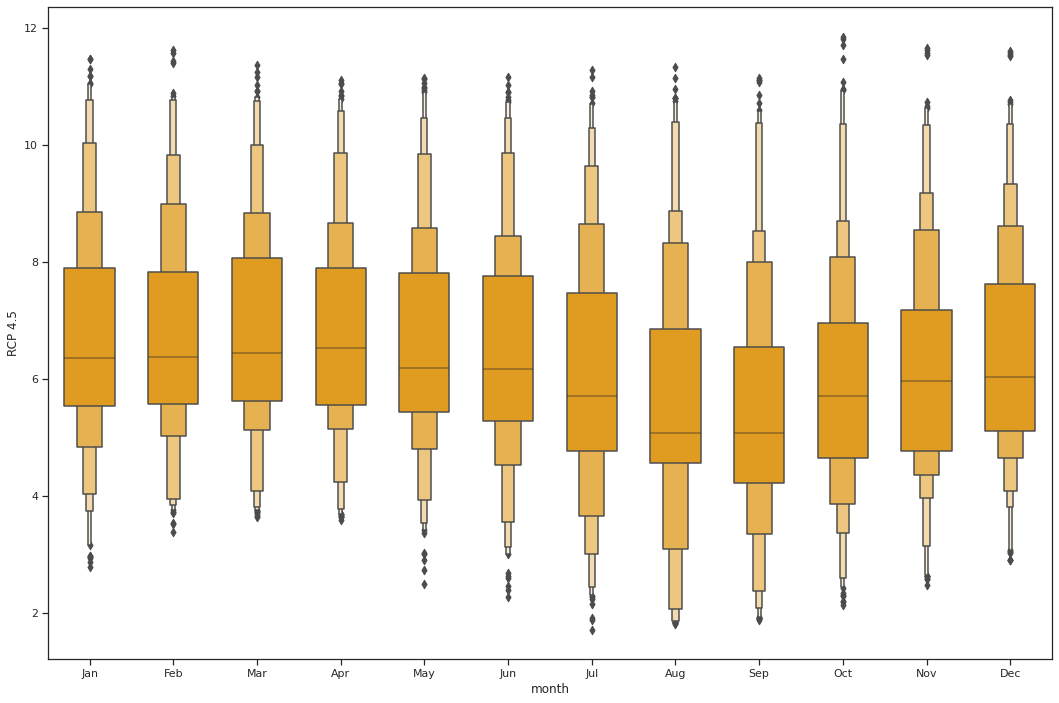

In [279]:
plt.figure(figsize = (18,12))
sns.boxenplot(x='month', y='RCP 4.5',
            data=RCp_join ,dodge = True,  color='orange', width = 0.6,)
#sns.swarmplot(x='Month', y='SF$[m^3/s]$',
 #           data=df_RCP45,  color = 'blue', size = 2,order = [9,10,11,12,1,2,3,4,5,6,7,8])


In [260]:

import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

tips

RCp_join = pd.DataFrame({'RCP 4.5': df_RCP45['SF$[m^3/s]$'].to_numpy(),
                         "RCP85": df_RCP45['SF$[m^3/s]$'].to_numpy() })

RCp_join = RCp_join.set_index(df_RCP45.index)
RCp_join['month'] = RCp_join.index.strftime('%b')


In [272]:
RCp_join

,RCP 4.5,RCP85,month
DATE,,,
2009-01-04,8.278953,8.278953,Jan
2009-01-11,8.348366,8.348366,Jan
2009-01-18,8.501008,8.501008,Jan
2009-01-25,8.516185,8.516185,Jan
2009-02-01,8.497207,8.497207,Feb
...,...,...,...
2099-11-29,4.222074,4.222074,Nov
2099-12-06,4.297359,4.297359,Dec
2099-12-13,4.407323,4.407323,Dec


## Im thinking we should use box plots to represent the tables 

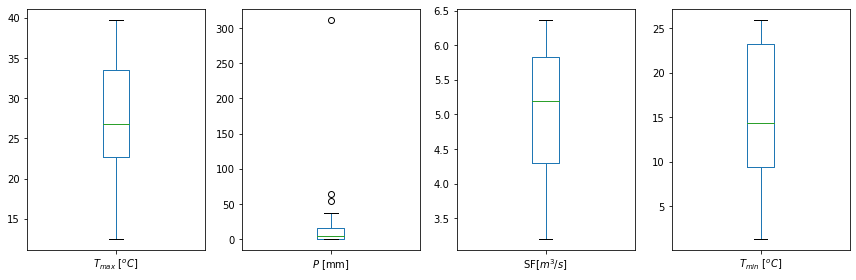

In [135]:
import numpy as np

names = temp[['$T_{max}$ [$^oC$]', '$P$ [mm]', 'SF$[m^3/s]$', '$T_{min}$ [$^oC$]']].columns
ncols = len(names)

fig, axes = plt.subplots(1,ncols, figsize = (12,4))
plt.grid(True)

for name, ax in zip(names, axes.flatten()):
    temp[[name]].plot.box(ax= ax, meanline = True ,)
    

plt.tight_layout()


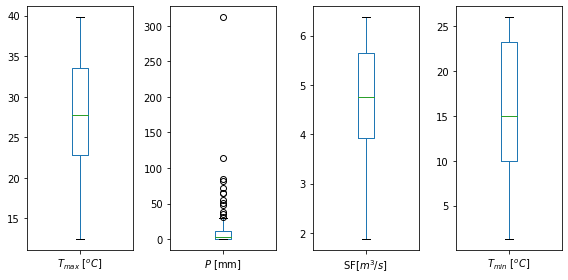

In [328]:
import numpy as np

names = df.columns
ncols = len(names)
fig, axes = plt.subplots(1,ncols, figsize = (8,4))

for name, ax in zip(names, axes.flatten()):
    df[[name]].plot.box(ax= ax, meanline = True ,)
    
plt.tight_layout()

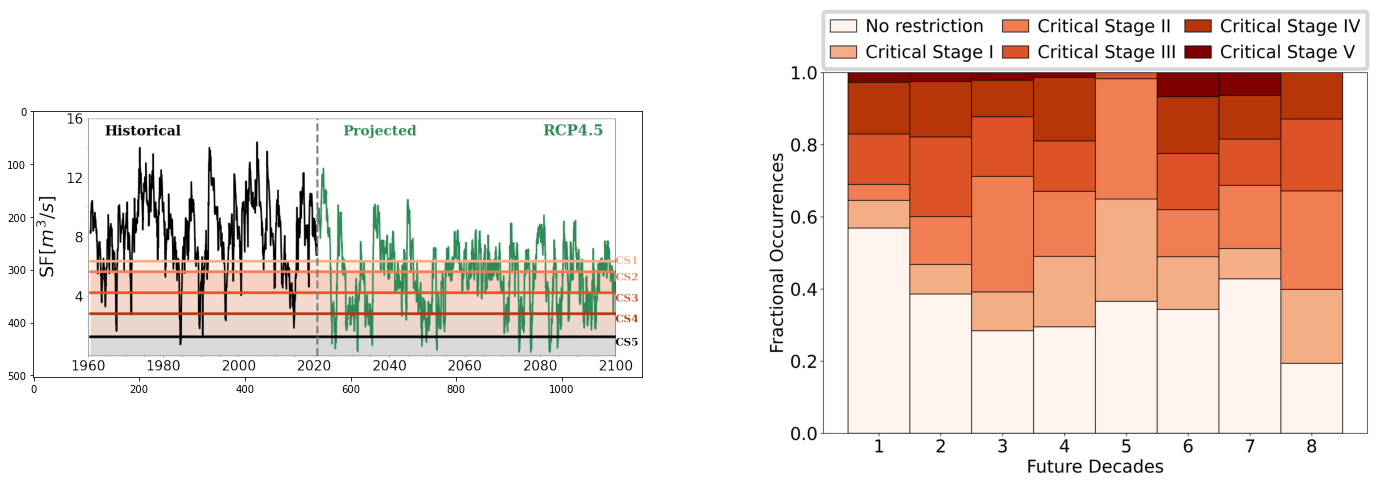

In [204]:
fig